In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
mnist=keras.datasets.mnist
(x_train,y_train), (x_test,y_test)=mnist.load_data()
x_train=keras.utils.normalize(x_train, axis=1)
x_test=keras.utils.normalize(x_test, axis=1)
# print(x_train[0])
# print(x_test.shape)
# for x in x_train:
#     plt.imshow(x, cmap=plt.cm.binary)
#     plt.show()
# plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.show()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

# predictions=model(x_test)
# tf.nn.softmax(predictions).numpy()
# # predictions.numpy()

In [ ]:
loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt=keras.optimizers.Adam()
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5717 - accuracy: 0.9033
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5128 - accuracy: 0.9506
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5009 - accuracy: 0.9618


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.5031 - accuracy: 0.9608
1.5031132698059082 0.9607999920845032


In [ ]:
model.save('num_detector.model')
new_model=keras.models.load_model('num_detector.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_detector.model/assets


In [ ]:
predictions=new_model.predict(x_test)
# print(predictions.shape)

7


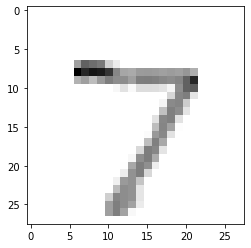

In [ ]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()